In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress
import gmaps

# Create basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a series of random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the list of latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | general roca
Processing Record 2 of Set 1 | maridi
Processing Record 3 of Set 1 | grand gaube
Processing Record 4 of Set 1 | rafai
Processing Record 5 of Set 1 | mitu
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | kostrzyn
Processing Record 9 of Set 1 | ribas do rio pardo
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | berger
Processing Record 13 of Set 1 | husavik
Processing Record 14 of Set 1 | awash
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | barentsburg
Processing Record 18 of Set 1 | avsyunino
Processing Record 19 of Set 1 | galle
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | makurdi
Processing Record 22 of Set 1 | belushya guba
Processing Record 23 of Set 1 |

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | general roca
Processing Record 2 of Set 1 | maridi
Processing Record 3 of Set 1 | grand gaube
Processing Record 4 of Set 1 | rafai
Processing Record 5 of Set 1 | mitu
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | kostrzyn
Processing Record 9 of Set 1 | ribas do rio pardo
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | berger
Processing Record 13 of Set 1 | husavik
Processing Record 14 of Set 1 | awash
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | avsyunino
Processing Record 19 of Set 1 | galle
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | makurdi
Processing Record 22 of Set 1 | belushya guba
Cit

Processing Record 37 of Set 4 | le port
Processing Record 38 of Set 4 | tucurui
Processing Record 39 of Set 4 | port-de-bouc
Processing Record 40 of Set 4 | taraz
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | boende
Processing Record 44 of Set 4 | adrar
Processing Record 45 of Set 4 | pimentel
Processing Record 46 of Set 4 | potgietersrus
City not found. Skipping...
Processing Record 47 of Set 4 | jumla
Processing Record 48 of Set 4 | boda
Processing Record 49 of Set 4 | mantua
Processing Record 50 of Set 4 | sokoto
Processing Record 1 of Set 5 | malwan
City not found. Skipping...
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | bainbridge
Processing Record 4 of Set 5 | shache
Processing Record 5 of Set 5 | saint-francois
Processing Record 6 of Set 5 | morant bay
Processing Record 7 of Set 5 | georgiyevka
Processing Record 8 of Set 5 | babanusah
City not found. Skipping...
Processing Record 9 of 

Processing Record 27 of Set 8 | vangaindrano
Processing Record 28 of Set 8 | karla
Processing Record 29 of Set 8 | belmonte
Processing Record 30 of Set 8 | svarstad
Processing Record 31 of Set 8 | stornoway
Processing Record 32 of Set 8 | pinos puente
Processing Record 33 of Set 8 | itaueira
Processing Record 34 of Set 8 | marienburg
Processing Record 35 of Set 8 | kegayli
City not found. Skipping...
Processing Record 36 of Set 8 | calvinia
Processing Record 37 of Set 8 | puerto ayora
Processing Record 38 of Set 8 | tiznit
Processing Record 39 of Set 8 | novoagansk
Processing Record 40 of Set 8 | nortelandia
Processing Record 41 of Set 8 | ouadda
Processing Record 42 of Set 8 | luchenza
Processing Record 43 of Set 8 | komarichi
Processing Record 44 of Set 8 | imbituba
Processing Record 45 of Set 8 | monduli
Processing Record 46 of Set 8 | kathmandu
Processing Record 47 of Set 8 | parintins
Processing Record 48 of Set 8 | ampanihy
Processing Record 49 of Set 8 | tupiza
Processing Record

Processing Record 14 of Set 12 | loja
Processing Record 15 of Set 12 | xuddur
Processing Record 16 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 12 | lisakovsk
Processing Record 18 of Set 12 | jiwani
Processing Record 19 of Set 12 | sistranda
Processing Record 20 of Set 12 | shetpe
Processing Record 21 of Set 12 | verkhniy mamon
Processing Record 22 of Set 12 | taoudenni
Processing Record 23 of Set 12 | xambioa
Processing Record 24 of Set 12 | dungarpur
Processing Record 25 of Set 12 | dovolnoye
Processing Record 26 of Set 12 | rawson
Processing Record 27 of Set 12 | krutikha
Processing Record 28 of Set 12 | oksfjord
Processing Record 29 of Set 12 | san rafael
Processing Record 30 of Set 12 | ileza
Processing Record 31 of Set 12 | paamiut
Processing Record 32 of Set 12 | darnah
Processing Record 33 of Set 12 | bela
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
len(city_data)

532

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,General Roca,-39.03,-67.58,59.00,47,0,14.99,AR,2020-10-22 02:03:56
1,Maridi,4.92,29.47,66.51,95,0,2.42,SS,2020-10-22 02:03:56
2,Grand Gaube,-20.01,57.66,71.01,84,51,1.01,MU,2020-10-22 01:59:24
3,Rafai,4.95,23.92,68.49,97,100,1.61,CF,2020-10-22 02:03:57
4,Mitu,1.20,-70.17,73.81,95,100,1.90,CO,2020-10-22 02:03:57
5,Bambous Virieux,-20.34,57.76,73.40,78,40,10.29,MU,2020-10-22 01:58:28
6,Coihaique,-45.58,-72.07,50.00,46,0,4.70,CL,2020-10-22 01:58:14
7,Kostrzyn,52.40,17.23,52.00,81,0,6.93,PL,2020-10-22 02:03:58
8,Ribas Do Rio Pardo,-20.44,-53.76,78.62,61,81,3.60,BR,2020-10-22 02:03:58
9,Ushuaia,-54.80,-68.30,50.00,53,75,10.29,AR,2020-10-22 01:56:50


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [10]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,General Roca,AR,2020-10-22 02:03:56,-39.03,-67.58,59.00,47,0,14.99
1,Maridi,SS,2020-10-22 02:03:56,4.92,29.47,66.51,95,0,2.42
2,Grand Gaube,MU,2020-10-22 01:59:24,-20.01,57.66,71.01,84,51,1.01
3,Rafai,CF,2020-10-22 02:03:57,4.95,23.92,68.49,97,100,1.61
4,Mitu,CO,2020-10-22 02:03:57,1.20,-70.17,73.81,95,100,1.90
5,Bambous Virieux,MU,2020-10-22 01:58:28,-20.34,57.76,73.40,78,40,10.29
6,Coihaique,CL,2020-10-22 01:58:14,-45.58,-72.07,50.00,46,0,4.70
7,Kostrzyn,PL,2020-10-22 02:03:58,52.40,17.23,52.00,81,0,6.93
8,Ribas Do Rio Pardo,BR,2020-10-22 02:03:58,-20.44,-53.76,78.62,61,81,3.60
9,Ushuaia,AR,2020-10-22 01:56:50,-54.80,-68.30,50.00,53,75,10.29


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import time module
import time
# Get todays date in seconds
today = time.time()
today

1603332359.0948238

In [14]:
today = time.strftime("%x")
today

'10/21/20'

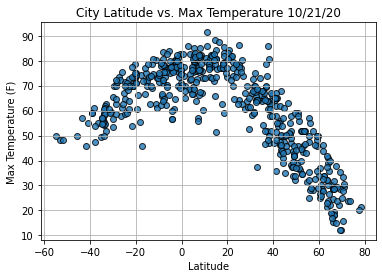

In [15]:
# Build the scatter plot for latitudes vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

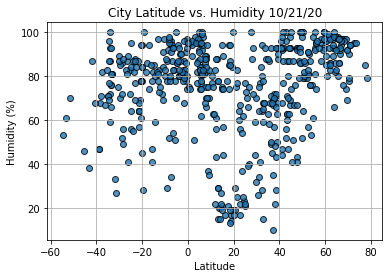

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

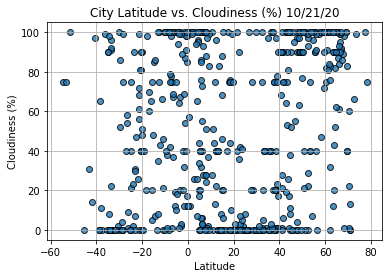

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

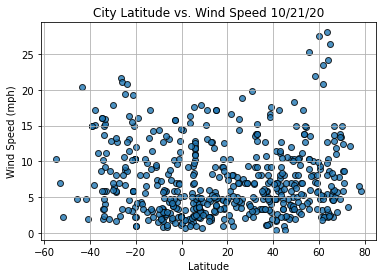

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to perform a linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_vale, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Awash
Country                        ET
Date          2020-10-22 02:03:59
Lat                          8.98
Lng                         40.17
Max Temp                    67.19
Humidity                       37
Cloudiness                     37
Wind Speed                   2.95
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Maridi,SS,2020-10-22 02:03:56,4.92,29.47,66.51,95,0,2.42
3,Rafai,CF,2020-10-22 02:03:57,4.95,23.92,68.49,97,100,1.61
4,Mitu,CO,2020-10-22 02:03:57,1.20,-70.17,73.81,95,100,1.90
7,Kostrzyn,PL,2020-10-22 02:03:58,52.40,17.23,52.00,81,0,6.93
11,Berger,NO,2020-10-22 02:03:58,59.55,10.37,50.00,93,100,5.82


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

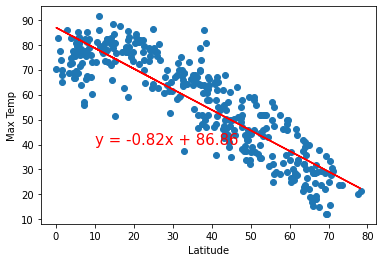

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

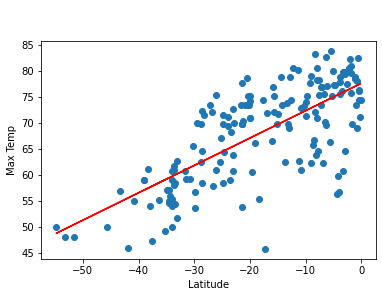

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

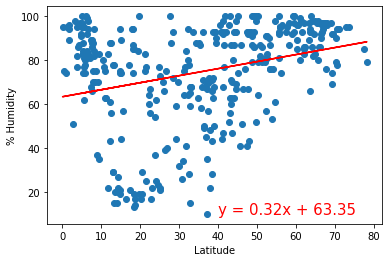

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

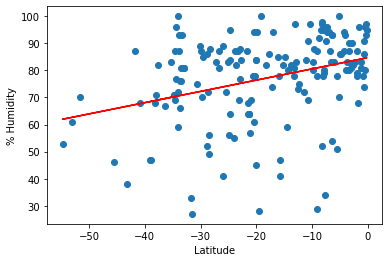

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

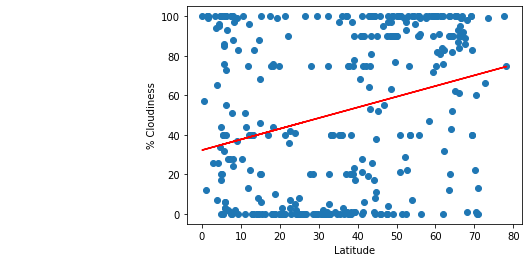

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


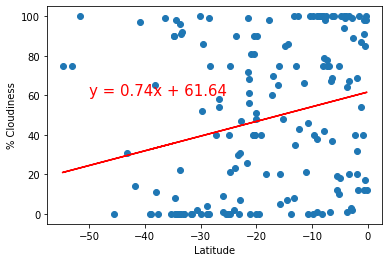

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

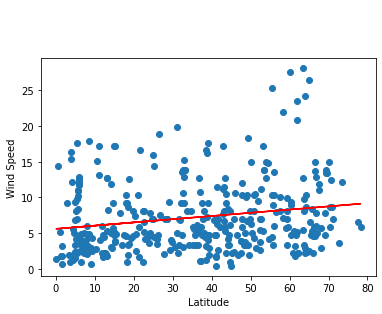

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

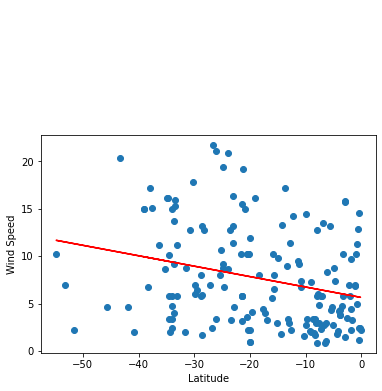

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [31]:
from config2 import g_key

In [32]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,General Roca,AR,2020-10-22 02:03:56,-39.03,-67.58,59.00,47,0,14.99
1,1,Maridi,SS,2020-10-22 02:03:56,4.92,29.47,66.51,95,0,2.42
2,2,Grand Gaube,MU,2020-10-22 01:59:24,-20.01,57.66,71.01,84,51,1.01
3,3,Rafai,CF,2020-10-22 02:03:57,4.95,23.92,68.49,97,100,1.61
4,4,Mitu,CO,2020-10-22 02:03:57,1.20,-70.17,73.81,95,100,1.90


In [33]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [34]:
# Configure gmaps to use API key
gmaps.configure(api_key=g_key)

In [35]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.65)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
# Heat map of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

#Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Create the heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

#Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [40]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
8,8,Ribas Do Rio Pardo,BR,2020-10-22 02:03:58,-20.44,-53.76,78.62,61,81,3.60
15,15,Georgetown,MY,2020-10-22 01:58:21,5.41,100.34,80.60,74,40,2.24
17,17,Galle,LK,2020-10-22 02:04:00,6.04,80.22,80.73,83,6,12.82
19,19,Makurdi,NG,2020-10-22 02:04:00,7.74,8.51,75.31,89,100,2.73
27,27,Totness,SR,2020-10-22 01:58:22,5.88,-56.32,81.28,80,6,12.15
30,30,Sitio Novo Do Tocantins,BR,2020-10-22 02:04:03,-5.52,-47.46,83.82,51,19,4.36
31,31,Srivardhan,IN,2020-10-22 02:04:03,18.03,73.02,78.89,85,0,4.63
34,34,Palanpur,IN,2020-10-22 02:04:04,24.17,72.43,77.68,62,2,5.03
35,35,Saint George,US,2020-10-22 01:57:43,37.10,-113.58,78.80,10,1,1.16
37,37,Hithadhoo,MV,2020-10-22 01:58:20,-0.60,73.08,82.60,74,12,12.88


In [41]:
preferred_cities_df.count()

City_ID       146
City          146
Country       146
Date          146
Lat           146
Lng           146
Max Temp      146
Humidity      146
Cloudiness    146
Wind Speed    146
dtype: int64

In [42]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
8,Ribas Do Rio Pardo,BR,78.62,-20.44,-53.76,
15,Georgetown,MY,80.60,5.41,100.34,
17,Galle,LK,80.73,6.04,80.22,
19,Makurdi,NG,75.31,7.74,8.51,
27,Totness,SR,81.28,5.88,-56.32,
30,Sitio Novo Do Tocantins,BR,83.82,-5.52,-47.46,
31,Srivardhan,IN,78.89,18.03,73.02,
34,Palanpur,IN,77.68,24.17,72.43,
35,Saint George,US,78.80,37.10,-113.58,
37,Hithadhoo,MV,82.60,-0.60,73.08,


In [44]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [53]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping")

Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping


In [56]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
8,Ribas Do Rio Pardo,BR,78.62,-20.44,-53.76,Ataíde Martins
15,Georgetown,MY,80.60,5.41,100.34,Cititel Penang
17,Galle,LK,80.73,6.04,80.22,Amangalla
19,Makurdi,NG,75.31,7.74,8.51,Doo Palace Hotel
27,Totness,SR,81.28,5.88,-56.32,STAATS LOGEERGEBOUW TOTNESS
30,Sitio Novo Do Tocantins,BR,83.82,-5.52,-47.46,Imperial Hotel
31,Srivardhan,IN,78.89,18.03,73.02,Savli Resort/Hotel - Shrivardhan
34,Palanpur,IN,77.68,24.17,72.43,Hotel Lajwanti
35,Saint George,US,78.80,37.10,-113.58,Best Western Plus Abbey Inn
37,Hithadhoo,MV,82.60,-0.60,73.08,Scoop Guest House


In [58]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [60]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [61]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))